# **Importing Libraries**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Importing Dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/project_file/text.csv")
df

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [ ]:
df1= df.sample(n=50000, random_state=1).reset_index(drop=True)  #Keeping 100,000 rows randomly for saster model development

**Checking for null values**

In [ ]:
df1.isna().sum()

,0
Unnamed: 0,0
text,0
label,0


**Dropping unnecessary column**

In [ ]:
df1.drop(['Unnamed: 0'],axis=1,inplace=True)
df1

,text,label
0,i would feel disheartened so i would then go a...,0
1,i want to enjoy holidays and not feel anxious ...,4
2,i could feel i immediately liked him as we tal...,2
3,i have been going to my same classes at the gy...,4
4,i still feel like i dont deserve such a sweet ...,1
...,...,...
49995,im feeling a little rebellious lately and i am...,3
49996,i couldnt feel much of what i should have duri...,1
49997,i want to die im bored with life this world ha...,0
49998,ive marvelled at the speed of which youre lear...,1


In [ ]:
df1['label'].value_counts() #according to the sourceThe emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)

,count
label,
1,17054
0,14291
3,6885
4,5825
2,4162
5,1783


In [ ]:
df1.dtypes

,0
text,object
label,int64


<Axes: xlabel='label', ylabel='count'>

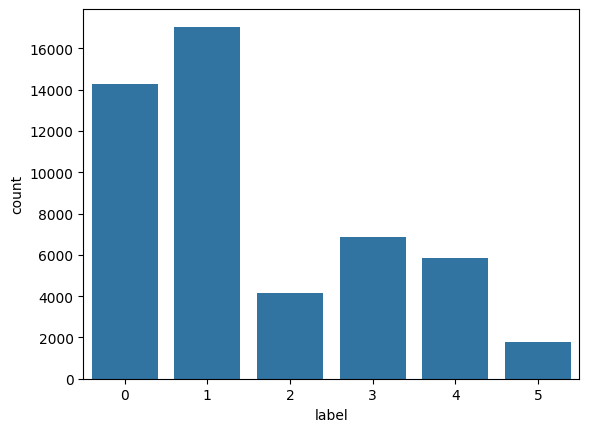

In [ ]:
sns.countplot(x='label',data=df1)

# **NLP-Natural Language Processing**

In [ ]:
text=df1.text
text

,text
0,i would feel disheartened so i would then go a...
1,i want to enjoy holidays and not feel anxious ...
2,i could feel i immediately liked him as we tal...
3,i have been going to my same classes at the gy...
4,i still feel like i dont deserve such a sweet ...
...,...
49995,im feeling a little rebellious lately and i am...
49996,i couldnt feel much of what i should have duri...
49997,i want to die im bored with life this world ha...
49998,ive marvelled at the speed of which youre lear...


**Removal of special character**

In [ ]:
text=text.str.replace("[^a-zA-Z0-9 ]","",regex=True)
text

,text
0,i would feel disheartened so i would then go a...
1,i want to enjoy holidays and not feel anxious ...
2,i could feel i immediately liked him as we tal...
3,i have been going to my same classes at the gy...
4,i still feel like i dont deserve such a sweet ...
...,...
49995,im feeling a little rebellious lately and i am...
49996,i couldnt feel much of what i should have duri...
49997,i want to die im bored with life this world ha...
49998,ive marvelled at the speed of which youre lear...


**Lemmatization and Tokenization**

In [ ]:
lemm=WordNetLemmatizer()

In [ ]:
text=text.apply(lambda line:[lemm.lemmatize(i.lower(),pos='v') for i in word_tokenize(line)]).apply(lambda i:' '.join(i))
text

,text
0,i would feel dishearten so i would then go and...
1,i want to enjoy holiday and not feel anxious e...
2,i could feel i immediately like him as we talk...
3,i have be go to my same class at the gym just ...
4,i still feel like i dont deserve such a sweet ...
...,...
49995,im feel a little rebellious lately and i be go...
49996,i couldnt feel much of what i should have duri...
49997,i want to die im bore with life this world hav...
49998,ive marvel at the speed of which youre learn n...


In [ ]:
stop_words=stopwords.words('english')

In [ ]:
text=text.apply(lambda line:[i for i in word_tokenize(line) if i not in stop_words]).apply(lambda i:" ".join(i))
text

,text
0,would feel dishearten would go cardio another ...
1,want enjoy holiday feel anxious every time one...
2,could feel immediately like talk along way bro...
3,go class gym havent time write move monday pos...
4,still feel like dont deserve sweet love husband
...,...
49995,im feel little rebellious lately go attempt th...
49996,couldnt feel much passionate encounter knightl...
49997,want die im bore life world nothing eternal li...
49998,ive marvel speed youre learn new skills feel p...


**Vectorisation**

In [ ]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(text)
X

<50000x22092 sparse matrix of type '<class 'numpy.float64'>'
	with 449444 stored elements in Compressed Sparse Row format>

In [ ]:
X.shape

(50000, 22092)

In [ ]:
y=df1['label']
y

,label
0,0
1,4
2,2
3,4
4,1
...,...
49995,3
49996,1
49997,0
49998,1


**Seperating the Dataset into training in testing sets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

**Model Creation and Evaluation**

In [ ]:
knn=KNeighborsClassifier()
rf=RandomForestClassifier(random_state=1)
adaBoost=AdaBoostClassifier(random_state=1)
svc=SVC()
nb=MultinomialNB()
dt=DecisionTreeClassifier(random_state=1)
models=[knn,rf,adaBoost,svc,nb,dt]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      4338
           1       0.78      0.86      0.82      5048
           2       0.73      0.48      0.58      1240
           3       0.84      0.72      0.78      2051
           4       0.81      0.68      0.74      1782
           5       0.78      0.55      0.64       541

    accuracy                           0.78     15000
   macro avg       0.78      0.70      0.73     15000
weighted avg       0.78      0.78      0.78     15000

RandomForestClassifier(random_state=1)
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4338
           1       0.88      0.91      0.89      5048
           2       0.81      0.62      0.70      1240
           3       0.87      0.88      0.87      2051
           4       0.82      0.84      0.83      1782
           5       0.72      0.72      0.72       541

    accuracy   

**Prediction using Best Model**

In [ ]:
y_new_pred=rf.predict(vectorizer.transform(["i dont know i feel so lost	"]))
if y_new_pred==0:
  print('sadness')
elif y_new_pred==1:
  print('joy')
elif y_new_pred==2:
  print('love')
elif y_new_pred==3:
  print('anger')
elif y_new_pred==4:
  print('fear')
else:
  print("surprise")

sadness


In [ ]:
import pickle
pickle.dump(rf,open("nlp_model.sav","wb"))
pickle.dump(vectorizer,open("vectorizer.sav","wb"))